In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\saman\OneDrive\Desktop\Data Science\ML Project -Logistic Regression\Datasets\diabetes.csv")

In [15]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data["BMI"] = data["BMI"].replace(0,data["BMI"].mean())
data["Glucose"] = data["Glucose"].replace(0,data["Glucose"].mean())
data["BloodPressure"] = data["BloodPressure"].replace(0,data["BloodPressure"].mean())
data["SkinThickness"] = data["SkinThickness"].replace(0,data["SkinThickness"].mean())
data["Insulin"] = data["Insulin"].replace(0,data["Insulin"].mean())


<Axes: >

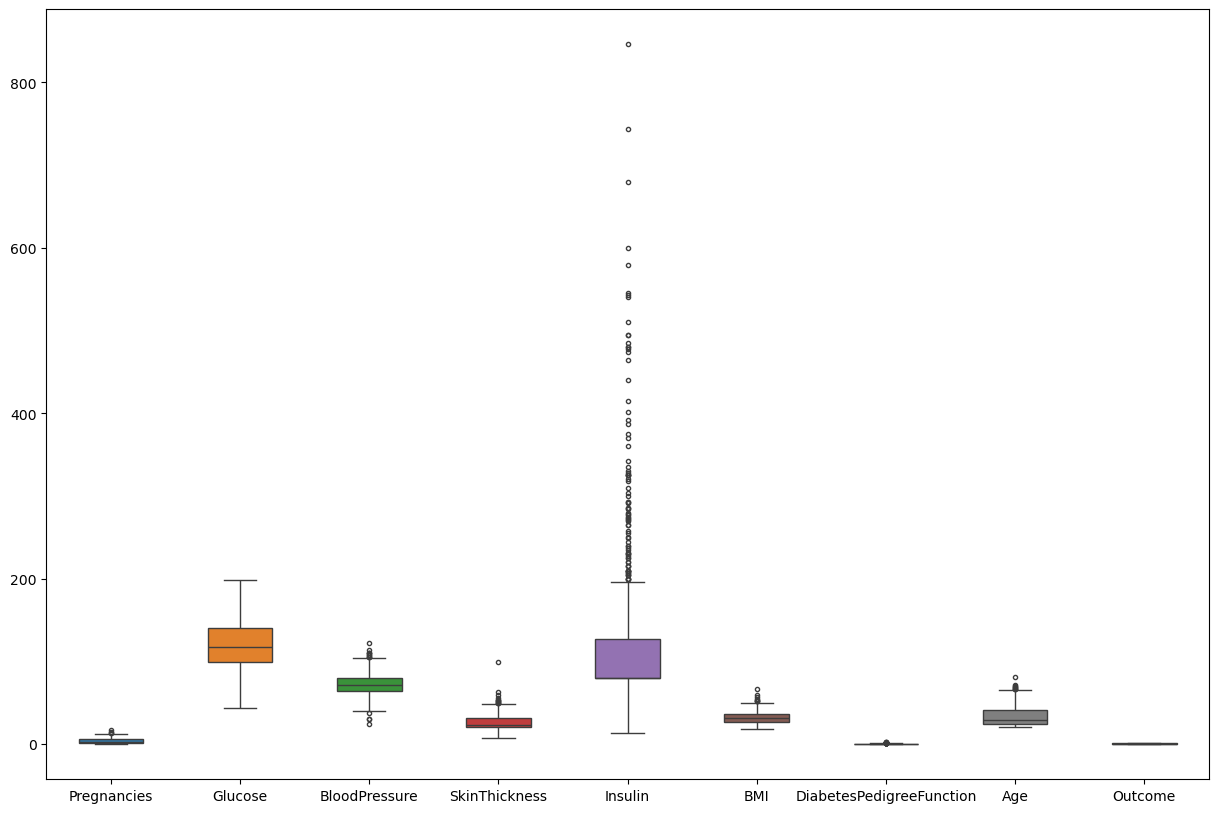

In [28]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width=0.5,ax=ax,fliersize=3)

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


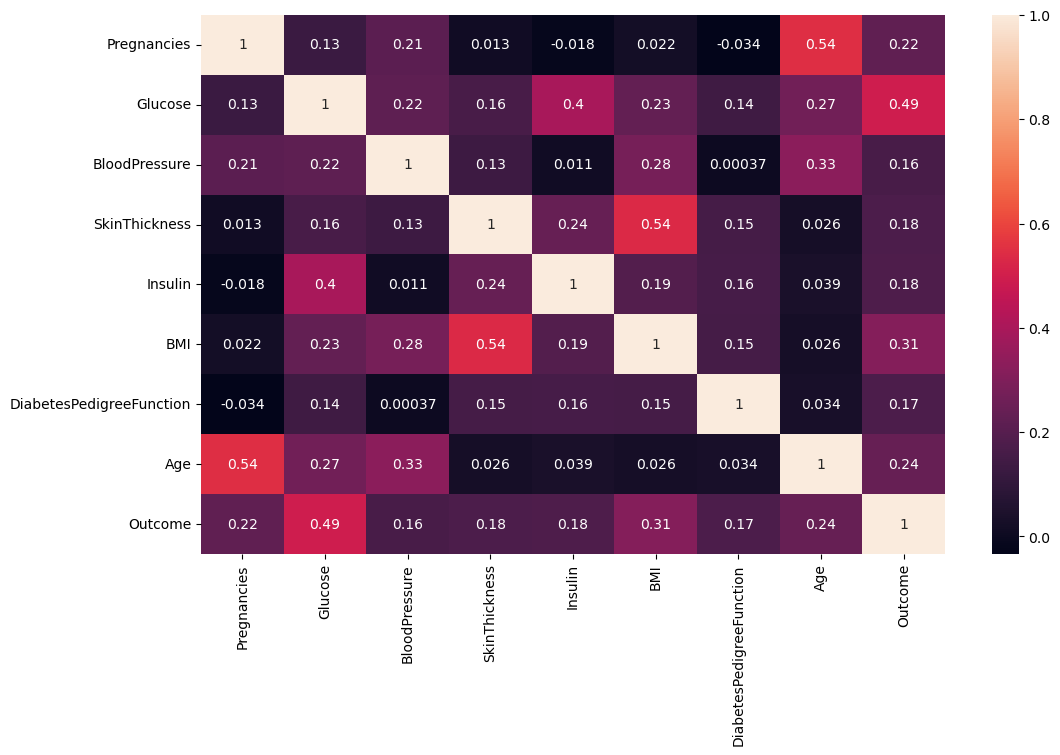

In [11]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr() ,annot=True)
plt.show()

In [29]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [30]:
# Dividing it into dependent and independent feature
data_copy  = data.copy(deep=True)

X = data_copy.drop(columns="Outcome")
y = data_copy['Outcome']

In [31]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [32]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Train test split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [34]:
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [35]:
y_train.shape , y_test.shape

((576,), (192,))

In [37]:
## Standard scaling
scaler  = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [39]:
# Saving scaler model

file = open(r'C:\Users\saman\OneDrive\Desktop\Data Science\ML Project -Logistic Regression\Models\Scaler.pkl','wb')
pickle.dump(scaler,file)

In [40]:
X_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [41]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

### Hyperparameter Tunning

In [42]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'penalty' : ['l1','l2'],
    'C' : np.logspace(-3,3,7),
    'solver' : ['newton-cg','lbfgs', 'liblinear'],
}

In [43]:
clf = GridSearchCV(log_reg,param_grid=parameters,scoring='accuracy',cv=10)
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [44]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [45]:
clf.best_score_

0.763793103448276

In [46]:
y_pred = clf.predict(x_test_scaled)

### Performance Metrics

In [47]:
con_mat = confusion_matrix(y_test,y_pred)

In [48]:
true_positive = con_mat[0][0]
false_positive = con_mat[0][1]
false_negative = con_mat[1][0]
true_negative = con_mat[1][1]

In [49]:
accuracy = (true_positive+true_negative)/(true_negative+false_positive+false_negative+true_positive)

In [50]:
precision = true_positive/(true_positive+false_positive)

In [51]:
recall = true_negative/(true_negative+false_negative)

In [52]:
f1_score = 2 * (recall*precision)/(recall+precision)

In [57]:
print(f"confusion Matrix \n{con_mat}\n")
print(f"True Positive {true_positive}\n")
print(f"False Positive {false_positive}\n")
print(f"False Negative {false_negative}\n")
print(f"True Negative {true_negative}\n")
print(f"Accuracy {accuracy}\n")
print(f"Precision {precision}\n")
print(f"Recall {recall}\n")
print(f"F1 Score {f1_score}\n")

confusion Matrix 
[[117  13]
 [ 26  36]]

True Positive 117

False Positive 13

False Negative 26

True Negative 36

Accuracy 0.796875

Precision 0.9

Recall 0.5806451612903226

F1 Score 0.7058823529411764



In [59]:
# Saving logistic Regression model

file = open(r'C:\Users\saman\OneDrive\Desktop\Data Science\ML Project -Logistic Regression\Models\Logistic Regression.pkl','wb')
pickle.dump(clf,file)